# 🧪 Snake Hybrid AI - Notebook de Testeo Interactivo
Este notebook permite probar el entorno `SnakeGame` paso a paso, visualizar estados y validar nuevas funcionalidades conforme se desarrollan los módulos del sistema híbrido.

In [1]:
# 🔁 Inicialización

from game.snake_game import SnakeGame, Point
import matplotlib.pyplot as plt
import numpy as np

# Parámetros del tablero
WIDTH, HEIGHT = 10, 10
game = SnakeGame(width=WIDTH, height=HEIGHT)

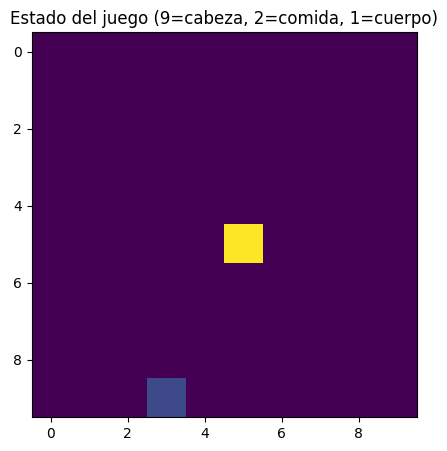

In [2]:
# 🔍 Visualización simple del tablero
def mostrar_tablero(game):
    tablero = np.zeros((game.height, game.width), dtype=int)
    for p in game.get_snake_body():
        tablero[p.y][p.x] = 1
    f = game.get_food()
    tablero[f.y][f.x] = 2
    h = game.get_head()
    tablero[h.y][h.x] = 9
    
    plt.figure(figsize=(5,5))
    plt.imshow(tablero, cmap='viridis', interpolation='none')
    plt.title('Estado del juego (9=cabeza, 2=comida, 1=cuerpo)')
    plt.grid(False)
    plt.show()

mostrar_tablero(game)

Recompensa: 0 | Terminado: False | Puntaje: 0


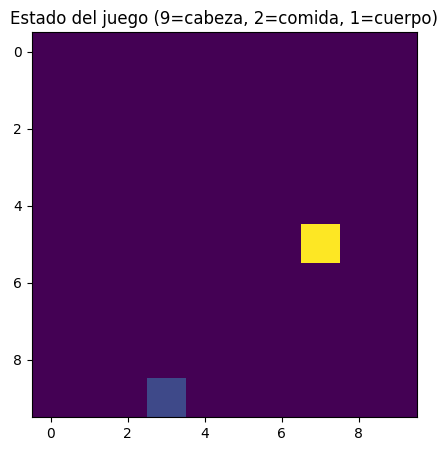

In [4]:
# ▶️ Ejecutar un paso manual
# Acción: [1,0,0]=recto, [0,1,0]=derecha, [0,0,1]=izquierda
accion = [1, 0, 0]
reward, done, score = game.play_step(accion)
print('Recompensa:', reward, '| Terminado:', done, '| Puntaje:', score)
mostrar_tablero(game)

In [5]:
# 🔁 Testeo del ciclo Hamiltoniano

from logic.hamiltonian import HamiltonianCycle, Point

# Crear ciclo para un tablero 10x10
hc = HamiltonianCycle(10, 10)

# Mostrar primeros 10 puntos del ciclo
print("Primeros 10 puntos del ciclo:")
for p in hc.path[:10]:
    print(p)

# Mostrar cómo se navega desde un punto cualquiera
p_actual = hc.path[5]
p_siguiente = hc.next_from(p_actual)
print(f"\\nDesde {p_actual} → siguiente en ciclo: {p_siguiente}")

Primeros 10 puntos del ciclo:
Point(x=0, y=0)
Point(x=1, y=0)
Point(x=2, y=0)
Point(x=3, y=0)
Point(x=4, y=0)
Point(x=5, y=0)
Point(x=6, y=0)
Point(x=7, y=0)
Point(x=8, y=0)
Point(x=9, y=0)
\nDesde Point(x=5, y=0) → siguiente en ciclo: Point(x=6, y=0)


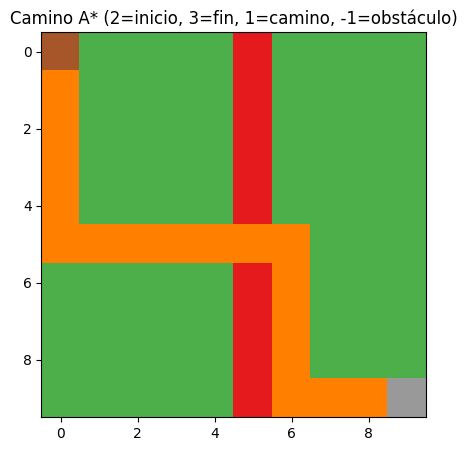

Camino encontrado:
[Point(x=0, y=0), Point(x=0, y=1), Point(x=0, y=2), Point(x=0, y=3), Point(x=0, y=4), Point(x=0, y=5), Point(x=1, y=5), Point(x=2, y=5), Point(x=3, y=5), Point(x=4, y=5), Point(x=5, y=5), Point(x=6, y=5), Point(x=6, y=6), Point(x=6, y=7), Point(x=6, y=8), Point(x=6, y=9), Point(x=7, y=9), Point(x=8, y=9), Point(x=9, y=9)]


In [6]:
# 🧠 Test de A* con obstáculos

from logic.astar import a_star, Point
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
start = Point(0, 0)
goal = Point(9, 9)
width, height = 10, 10
obstacles = {Point(5, y) for y in range(10) if y != 5}

# Ejecutar A*
path = a_star(start, goal, width, height, obstacles)

# Visualización
tablero = np.zeros((height, width))
for o in obstacles:
    tablero[o.y, o.x] = -1  # obstáculos
if path:
    for p in path:
        tablero[p.y, p.x] = 1
tablero[start.y, start.x] = 2  # inicio
tablero[goal.y, goal.x] = 3    # destino

plt.figure(figsize=(5,5))
plt.imshow(tablero, cmap='Set1', interpolation='none')
plt.title("Camino A* (2=inicio, 3=fin, 1=camino, -1=obstáculo)")
plt.grid(False)
plt.show()

if path:
    print("Camino encontrado:")
    print(path)
else:
    print("❌ No se encontró camino.")

In [7]:
# 🔐 Testeo de seguridad de camino (safety.py)

from logic.safety import is_path_safe, Point
from collections import deque

# Simulación de cuerpo actual
body = [Point(2, 2), Point(2, 3), Point(2, 4)]

# Path seguro (sigue hacia la derecha)
path_ok = [
    Point(2, 2),
    Point(3, 2),
    Point(4, 2),
    Point(5, 2)
]

# Path inseguro (choca contra su propio cuerpo)
path_bad = [
    Point(2, 2),
    Point(2, 3),
    Point(2, 4),
    Point(2, 3)  # vuelve sobre sí misma
]

print("✅ Path seguro:", is_path_safe(path_ok, body))
print("❌ Path inseguro:", is_path_safe(path_bad, body))


✅ Path seguro: True
❌ Path inseguro: False


In [ ]:
# 🧠 Test del HybridAgent paso a paso

from agent.agent import HybridAgent
from game.snake_game import SnakeGame
import matplotlib.pyplot as plt
import numpy as np

# Reiniciar juego
game = SnakeGame(width=10, height=10)
agent = HybridAgent(game)

# Función para visualizar el estado
def visualizar_estado(game):
    tablero = np.zeros((game.height, game.width), dtype=int)
    for p in game.get_snake_body():
        tablero[p.y][p.x] = 1
    f = game.get_food()
    tablero[f.y][f.x] = 2
    h = game.get_head()
    tablero[h.y][h.x] = 9
    plt.figure(figsize=(5,5))
    plt.imshow(tablero, cmap='Set1', interpolation='none')
    plt.title('HybridAgent - Estado actual')
    plt.grid(False)
    plt.show()

# Ejecutar varios pasos con el agente híbrido
for i in range(10):
    print(f"--- Paso {i+1} ---")
    action = agent.get_action()
    reward, done, score = game.play_step(action)
    print("Acción:", action)
    print("Puntaje:", score, "| Recompensa:", reward, "| Terminado:", done)
    visualizar_estado(game)
    if done:
        print("☠️ Juego terminado.")
        break